In [40]:
# Install the required libraries
# !pip install requests pandas matplotlib seaborn

In [42]:
# Import the libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
def get_weather(city, api_key):
    """Fetches and processes weather data for a given city from OpenWeatherMap."""
    # The base URL for the current weather data API
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    # Parameters for the API request
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # Use 'imperial' for Fahrenheit
    }
    
    try:
        response = requests.get(base_url, params=params)
        # Raise an exception for bad status codes (4xx or 5xx)
        response.raise_for_status()
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the relevant weather details
        weather_info = {
            'City': data['name'],
            'Country': data['sys']['country'],
            'Temperature (°C)': data['main']['temp'],
            'Feels Like (°C)': data['main']['feels_like'],
            'Humidity (%)': data['main']['humidity'],
            'Description': data['weather'][0]['description'].title()
        }
        return weather_info
        
    except requests.exceptions.HTTPError as http_err:
        if response.status_code == 404:
            print(f"Error: City not found - {city}")
        elif response.status_code == 401:
            print("Error: Invalid API key. Please check your key and try again.")
        else:
            print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
        
    return None

In [46]:
# --- IMPORTANT: PASTE YOUR API KEY HERE ---
API_KEY = "*****************************" 

# List of cities to fetch weather data for
cities = ["Lagos", "Tokyo", "New York", "London", "Sydney", "Dubai"]

weather_data = []
for city in cities:
    print(f"Fetching weather for {city}...")
    data = get_weather(city, API_KEY)
    if data:
        weather_data.append(data)

# Create a pandas DataFrame from the collected data
df = pd.DataFrame(weather_data)

# Display the DataFrame
print("\nCurrent Weather Conditions:")
display(df)

Fetching weather for Lagos...
Fetching weather for Tokyo...
Fetching weather for New York...
Fetching weather for London...
Fetching weather for Sydney...
Fetching weather for Dubai...

Current Weather Conditions:


,City,Country,Temperature (°C),Feels Like (°C),Humidity (%),Description
0,Lagos,NG,29.36,32.93,67,Broken Clouds
1,Tokyo,JP,18.37,18.66,92,Light Rain
2,New York,US,8.66,6.07,67,Clear Sky
3,London,GB,13.68,13.17,79,Overcast Clouds
4,Sydney,AU,21.54,21.63,72,Light Rain
5,Dubai,AE,34.96,37.44,41,Clear Sky



Comparing Temperatures Across Cities:


C:\Users\New\AppData\Local\Temp\ipykernel_11708\307114285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Temperature (°C)', data=df.sort_values('Temperature (°C)', ascending=False), palette='coolwarm')


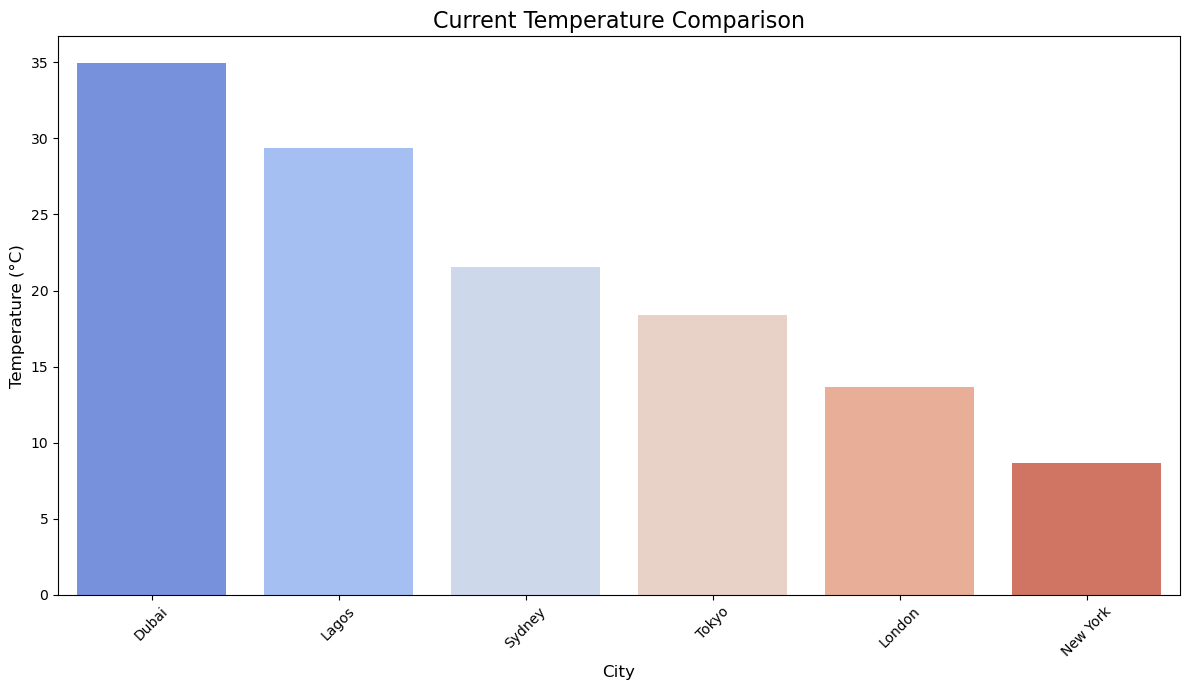

In [48]:
# Ensure the DataFrame is not empty before plotting
if not df.empty:
    print("\nComparing Temperatures Across Cities:")
    
    plt.figure(figsize=(12, 7))
    sns.barplot(x='City', y='Temperature (°C)', data=df.sort_values('Temperature (°C)', ascending=False), palette='coolwarm')
    
    plt.title('Current Temperature Comparison', fontsize=16)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()